# Import Dependencies

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Getting the Data

In [2]:
df = pd.read_csv("final_merged_df.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982813 entries, 0 to 5982812
Data columns (total 26 columns):
user_title                       object
user_clevel                      int64
user_indus                       int64
user_disc                        int64
user_country                     object
user_region                      int64
user_premium                     float64
user_numb_work_experiences       int64
user_years_experience            int64
user_years_experience_current    int64
user_edu_degree                  int64
user_edu_fieldofstudies          object
user_wtcj                        int64
item_title                       object
item_clevel                      int64
item_indus                       int64
item_disc                        int64
item_country                     object
item_region                      int64
item_is_payed                    int64
item_employment                  int64
item_tags                        object
item_created_at      

### 5 982 813 Entries

### 27 Features: (20) numeric, (7) objects

# Train/Test Split

In [4]:
train = df.iloc[:4000000] # train = 4 million datapoints
test = df.iloc[4000000:] # test = 1,9 million datapoints

In [5]:
train.tail(3)

,user_title,user_clevel,user_indus,user_disc,user_country,user_region,user_premium,user_numb_work_experiences,user_years_experience,user_years_experience_current,...,item_disc,item_country,item_region,item_is_payed,item_employment,item_tags,item_created_at,interaction_type,interaction_created_at,scores
3999997,"[2923342, 3562023, 2489581]",3,16,17,ch,0,0.0,3,6,2,...,17,de,6,1,1,"[1385885, 2139882, 399503, 3797268, 2103114, 2...",1478214000,4,1478531448,-5
3999998,"[3606563, 864194, 3248841]",4,15,4,de,10,0.0,3,6,1,...,17,de,6,1,1,"[1385885, 2139882, 399503, 3797268, 2103114, 2...",1478214000,4,1478596538,-5
3999999,[2134393],4,15,4,ch,0,1.0,3,7,3,...,17,de,6,1,1,"[1385885, 2139882, 399503, 3797268, 2103114, 2...",1478214000,4,1478682938,-15



# Exploratory Data Analysis:

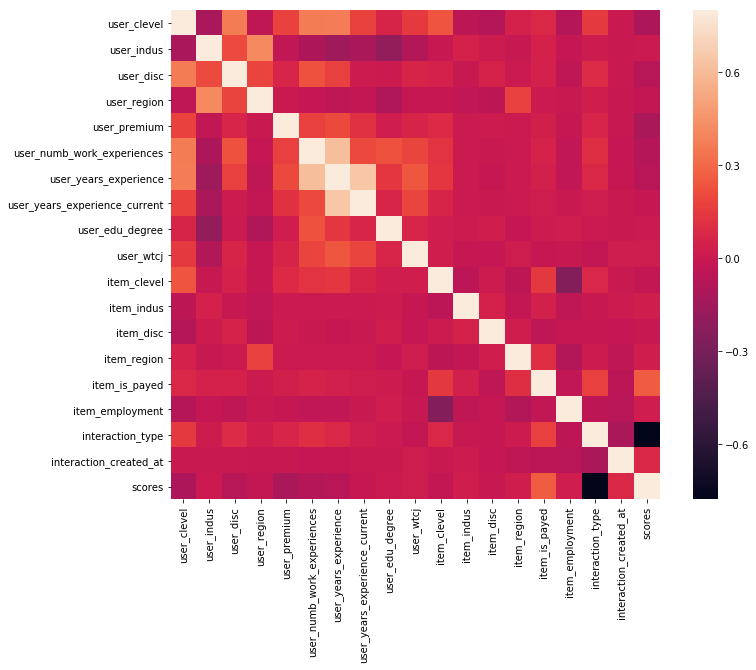

In [6]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

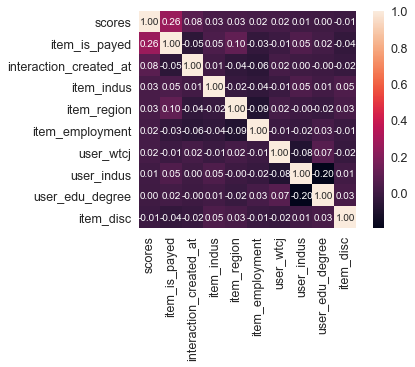

In [7]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'scores')['scores'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 1. Univariable Analysis
Inspecting the target variables interaction_type & Score.


### Interaction-Type

In [8]:
interactions = train["interaction_type"].value_counts()
df_train = pd.DataFrame(data=interactions)
df_train["%"] = df_train["interaction_type"].apply(lambda x: x / df_train["interaction_type"].sum() * 100)
#df_train["%"] = round(df_train["%"])
df_train.rename(columns={"interaction_type" : 'Sum'},inplace=True)

Distribution of Interaction-Type:


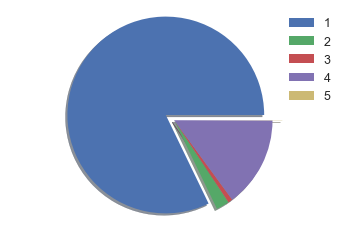

,Sum,%
1,3289882,82.247050
4,602331,15.058275
2,76962,1.924050
3,29165,0.729125
5,1660,0.041500


In [9]:
print("Distribution of Interaction-Type:")

labels = '1', '2', '3', '4', '5'
sizes = [82.15, 2.15, 0.73, 14.91, 0.041]
explode = (0.1, 0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, shadow=True, startangle=0)
ax1.axis('equal')
plt.legend(labels=labels)
plt.show()
df_train

### Scores

In [10]:
interactions = train["scores"].value_counts()
df_train = pd.DataFrame(data=interactions)
df_train["%"] = df_train["scores"].apply(lambda x: x / df_train["scores"].sum() * 100)
df_train.rename(columns={"scores" : 'Sum'},inplace=True)

Distribution of Scores:


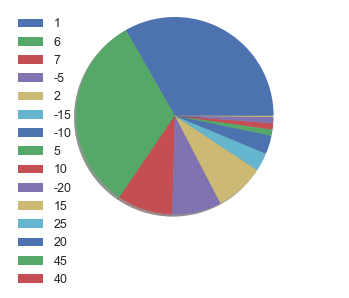

,Sum,%
1,1343916,33.597900
6,1283215,32.080375
7,343393,8.584825
-5,319824,7.995600
2,319358,7.983950
-15,135176,3.379400
-10,110829,2.770725
5,57574,1.439350
10,40647,1.016175
-20,36502,0.912550


In [11]:
print("Distribution of Scores:")

labels = '1', '6', '7', '-5', '2', '-15', '-10', '5', '10', '-20', '15', '25', '20', '45', '40'
sizes = [33, 32, 9, 8, 8, 3, 3, 1, 1, 1, 0.2, 0.01, 0.01, 0.005, 0.005]
#explode = (0.1, 0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, shadow=True, startangle=0)
ax1.axis('equal')
plt.legend(labels=labels)
plt.show()
df_train

In [12]:
# one-hot encode the interaction_type variable to inspect every interaction type separately
train = pd.get_dummies(train, columns=['interaction_type'])

## 1. Univariable Analysis
Inspect how the dependent variable and independent variables relate.


### user_title & item_title


Are there any jobs where people are more actively looking for a new job? Does a match in user and item title contribute to a high score and interaction?

In [13]:
train["user_title"].describe()

count     4000000
unique     234079
top           [0]
freq       187494
Name: user_title, dtype: object

In [18]:
train["item_title"].value_counts()

[]                                                                                                          276152
[4432048, 4028770]                                                                                           39206
[3698446]                                                                                                    29271
[3055643]                                                                                                    27787
[818603, 3544650, 3020707, 1504937, 531856, 2149973, 1935579, 2994300, 434858, 4302676, 427470, 4238250]     22707
[1762890]                                                                                                    22113
[3698446, 4191181]                                                                                           21477
[4302676, 3020707, 3544650, 434858, 531856, 1504937]                                                         21103
[1074124, 4432048, 4028770, 4195757, 373883, 2644164, 721436]                   

These two features have a lot of unique values and therefore it makes no sense to plot them. But I think they could contain valuable informatio when we have a ,atch of the same title between an item and a user.

### user_clevel & item_clevel

In [14]:
train["user_clevel"].value_counts()

0    1922502
3    1095927
4     551565
2     141289
5     132302
6     124697
1      31718
Name: user_clevel, dtype: int64

* 0 = unknown
* 1 = Student/Intern
* 2 = Entry Level (Beginner)
* 3 = Professional/Experienced
* 4 = Manager (Manager/Supervisor)
* 5 = Executive (VP, SVP, etc.)
* 6 = Senior Executive (CEO, CFO, President)

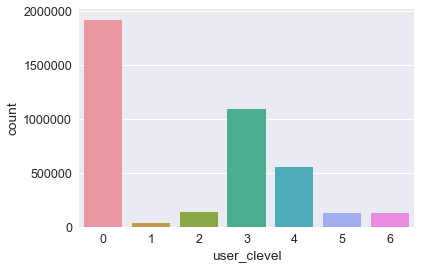

In [15]:
# show distribution of the categories of user c_level
sns.countplot(x="user_clevel", data=train);

The User C_Levels that happen the most often are...

1. Unknown
2. Professional/Experienced
3. Manager
4. Entry-Level
5. Executive & also Senior Executive
6. Student/Intern

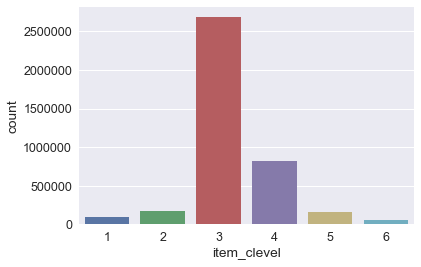

In [16]:
# lets do the same for item item_cleve
sns.countplot(x="item_clevel", data=train);

The Item C_Levels that happen the most often are...

1. Professional/Experienced
2. Manager
3. Entry-Level
4. Executive 
5. Student/Intern
6. Senior Executive

Note that there is no unknown C_Level within the items.

What insights can we learn from this?
* "Professional/Experienced" is the c-level that is most second common at the users the most common at items. 
* most of the user c-levels are unknown, which makes this features less important


Although that a lot of user-clevels are unknown and most items and users are "Professional/Experienced", I think this feature could be valuable since a person that has the c-level of an intern isn't the appropriate candidate for a Senior Executive Job-Posting and therefore it would be nonsense to show him this posting as an add.

### user_indus & item_indus

In [19]:
train["user_indus"].value_counts()

0     1451660
20     398703
7      392092
16     256240
15     241372
12     168168
3      161182
6      110588
14      96482
17      88702
8       70440
18      66689
21      62603
5       59137
9       52806
4       50802
2       48376
23      40319
13      33055
11      32653
19      31866
22      31567
1       27983
10      26515
Name: user_indus, dtype: int64

In [24]:
print("Categories:", len(train["user_indus"].value_counts()))

Categories: 24


### user_disc & item_disc

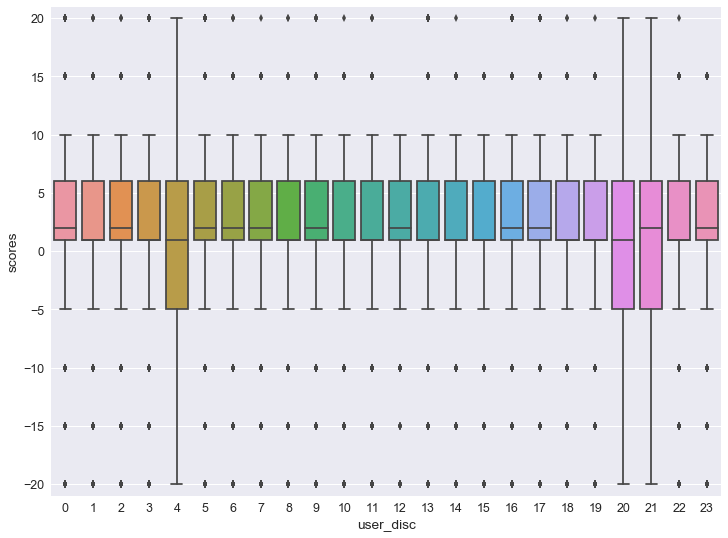

In [21]:
var = 'user_disc'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x=var, y="scores", data=data)
fig.axis(ymin=-21, ymax=21);

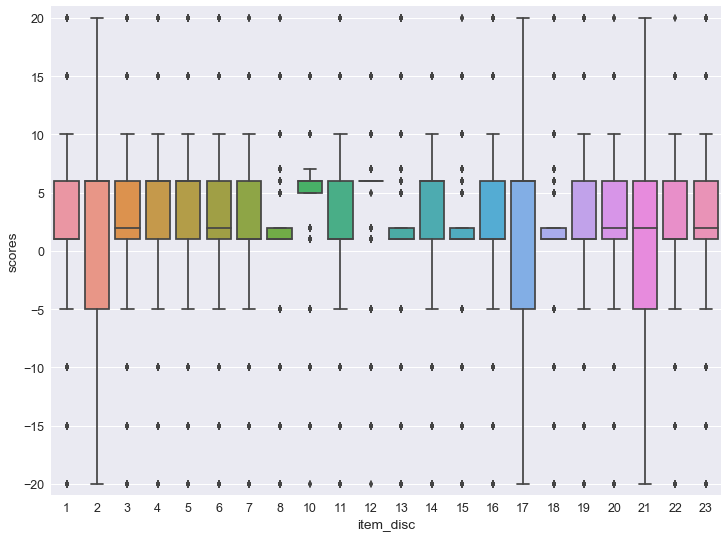

In [22]:
var = 'item_disc'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x=var, y="scores", data=data)
fig.axis(ymin=-21, ymax=21);

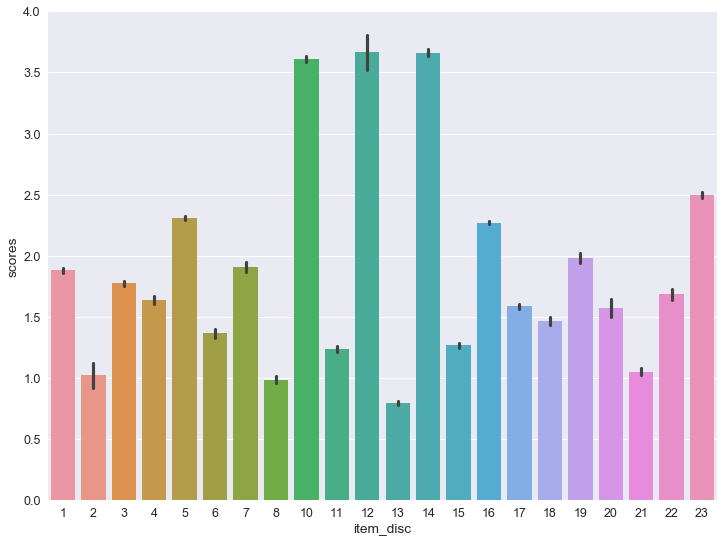

In [23]:
var = 'item_disc'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.barplot(x=var, y="scores", data=data)
fig.axis(ymin=0, ymax=4);

Through these plots we see that some values reach higher scores than other. Because of that I think these features could contain valuable information.

### user_country & item_country

In [25]:
train["user_country"].value_counts()

de          3434331
ch           225212
non_dach     172742
at           167715
Name: user_country, dtype: int64

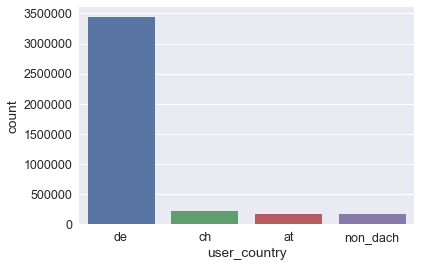

In [26]:
sns.countplot(x="user_country", data=train);

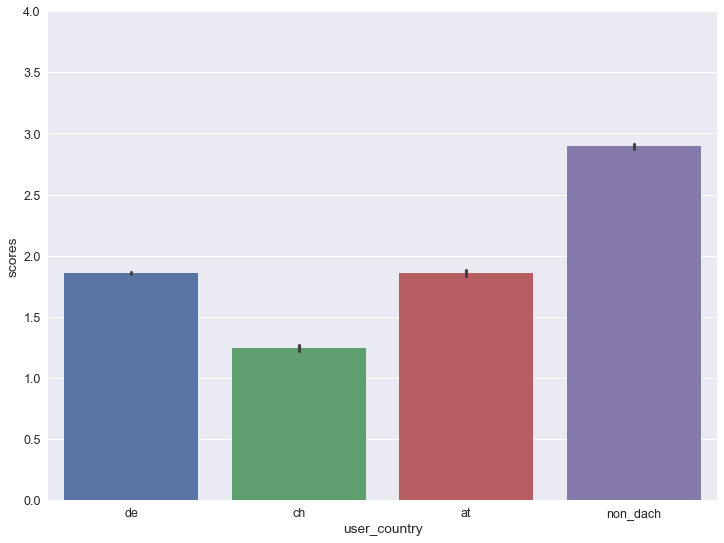

In [27]:
var = 'user_country'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.barplot(x=var, y="scores", data=data)
fig.axis(ymin=0, ymax=4);

It is clearly visible that nearly all users are from Germany. Therefore I think this is one of the features that contains the least valuable information. The only valuable information this feature could give the algorithm would be if the user is "non_dach", cause this could result in a high score.

### user_region & item_region

In [28]:
train["user_region"].value_counts()

0     2031837
2      399590
9      377867
1      369946
7      231490
10     185173
6      178195
3      131065
4       27193
13      26736
5       18263
8        7166
15       5217
12       4558
11       2590
14       2360
16        754
Name: user_region, dtype: int64

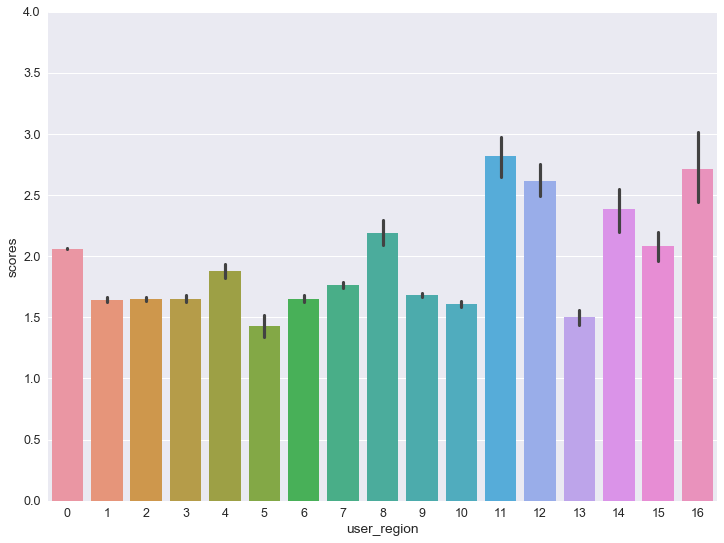

In [29]:
var = 'user_region'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.barplot(x=var, y="scores", data=data)
fig.axis(ymin=0, ymax=4);

I would say this is also one of the features with the least information, except if we have a match between user and item and the user is only searching for a job in his region.

### user_premium

This feature is important for a high score, since premium users get weighted heavier.

### user_numb_work_experiences

In [30]:
train["user_numb_work_experiences"].value_counts()

3    1912818
1    1168753
2     918429
Name: user_numb_work_experiences, dtype: int64

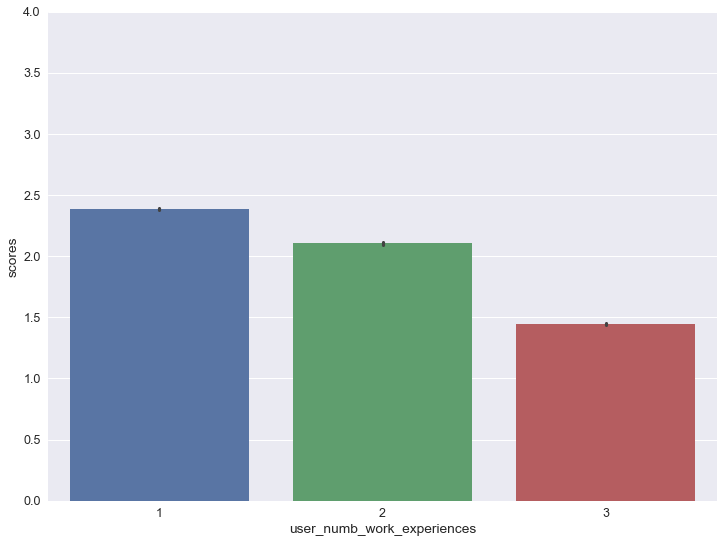

In [31]:
var = 'user_numb_work_experiences'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.barplot(x=var, y="scores", data=data)
fig.axis(ymin=0, ymax=4);

This bar chart makes it clearly visible that a "user_numb_work_experiences" of 1 makes a higher score possible.

### user_years_experience

In [33]:
train["user_years_experience"].value_counts()

7    832089
4    772407
5    748979
0    697291
6    641061
3    185227
2     99193
1     23753
Name: user_years_experience, dtype: int64

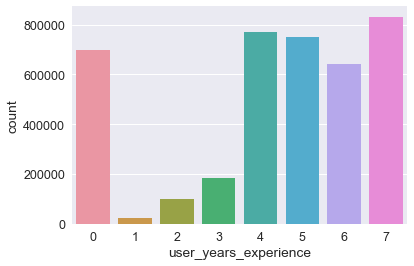

In [35]:
# show distribution
sns.countplot(x="user_years_experience", data=train);

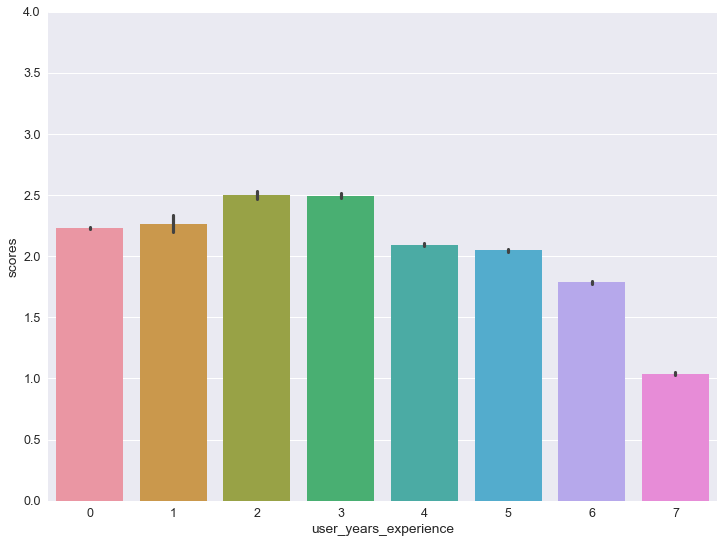

In [36]:
var = 'user_years_experience'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.barplot(x=var, y="scores", data=data)
fig.axis(ymin=0, ymax=4);

Looks good. Different levels of experience have different ranges of scores. Therefore I would say this feature is valuable.

### user_years_experience_current

In [37]:
train["user_years_experience_current"].value_counts()

2    1075920
0     795302
1     586295
4     582853
3     549398
5     210133
6     116469
7      83630
Name: user_years_experience_current, dtype: int64

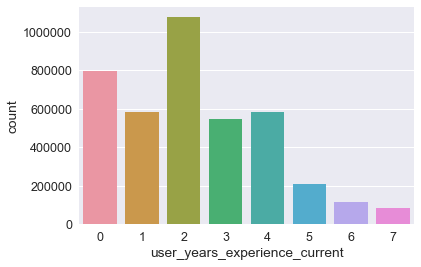

In [38]:
# show distribution
sns.countplot(x="user_years_experience_current", data=train);

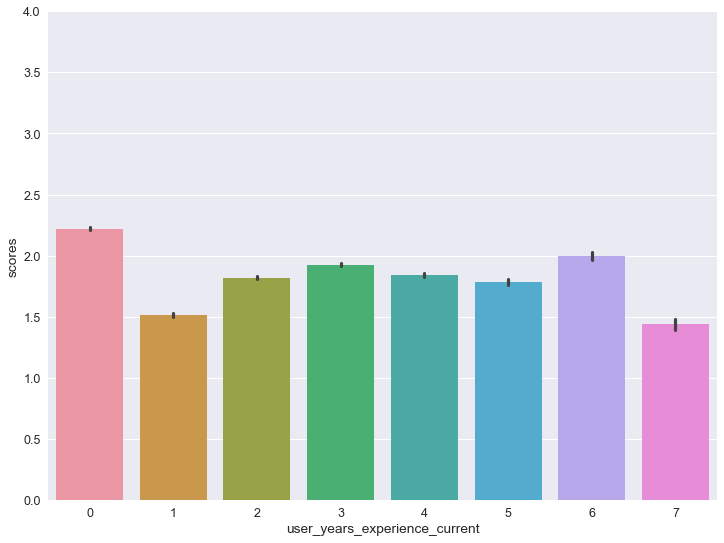

In [39]:
var = 'user_years_experience_current'
data = pd.concat([train['scores'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.barplot(x=var, y="scores", data=data)
fig.axis(ymin=0, ymax=4);

The values are roughly equal distributed.